# Goal of the project (for reference)

As an Associated Data Scientist, you will be joining a team who is on a mission to disrupt the logistics
industry by using statistical knowledge with machine learning plus other algorithmic techniques to drive
business impact and take our technology to new heights with data science. For this interview project,
you will be asked to play the role of an associate data scientist taking the hypothetical scenario below
and transforming it into a model to automate the manual order acceptance process at C.H. Robinson.

# Data and Notebook Setup

Summary: The data has a shape (161563, 16) with 161563 rows and 16 columns. The CurrentCondition column has 8 categories including 'Accepted' and 'Rejected'. It also has a category called 'nan' which might be orders with unknown current condition category.

In [1]:
# import data
import pandas as pd
order_acceptance_df = pd.read_csv('IMA Recommendation Simulation Data.csv')

In [2]:
order_acceptance_df

,Unnamed: 0,request_id,week_id,weekday,miles,order_equipment_type,order_distance,order_num_stops,order_origin_weight,lead_days,color,origin_dat_ref,dest_dat_ref,rate_norm,est_cost_norm,CurrentCondition
0,0,c2653eda11cd4d94879d1946392eb2b5,4,Sat,1856,V,1848.0,2,40000.0,3,RED,633,978,2.273442,2.138631,Accepted
1,1,65e3dcc84a2246e68ea8636a967b31b2,3,Mon,56,V,47.0,2,12729.0,3,RED,604,604,-0.971030,-1.017024,Rejected
2,2,0a86f005640a4204b46c95ca033a7ced,1,Fri,259,V,255.0,2,44176.0,3,RED,761,770,-0.393352,-0.475805,Accepted
3,3,1105b4bc7b444f7985d4ad810e7acbc2,3,Thu,71,V,68.0,2,39847.0,6,RED,187,180,-0.706546,-0.765855,Rejected
4,4,de538100bb0f4137961b9551640ef35e,3,Fri,1182,R,1183.0,2,34912.0,3,GREEN,972,922,1.014233,0.469273,Accepted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161558,161558,a15fa8bdb9924162999c502997b80ad2,4,Thu,274,V,0.0,2,44084.0,1,GREEN,170,119,0.791117,-0.045967,Accepted
161559,161559,151354fa712049f1a6d1644ec17878f9,4,Tue,213,V,201.0,2,43500.0,7,YELLOW,57,132,-0.189311,-0.223419,Rejected
161560,161560,fa71111ad30d492683f9a6a5fbc9f07e,4,Tue,300,V,308.0,2,43500.0,3,GREEN,551,527,-0.709962,-0.658659,Accepted
161561,161561,22de0c744a4741c2a1f14bf4a520a3c0,4,Wed,2209,V,2213.0,2,8280.0,12,GREEN,490,945,2.681378,1.530088,Accepted


In [3]:
# shape of the data
print(order_acceptance_df.shape)

(161563, 16)


In [4]:
# unique categories for CurrentCondition
order_acceptance_df['CurrentCondition'].unique()

array(['Accepted', 'Rejected', 'Withdrawn', 'Waiting On Acceptance',
       'Cancelled', nan, 'Waiting On Recommendation', 'NoPace'],
      dtype=object)

In [5]:
# number of categories for CurrentCondition
len(order_acceptance_df['CurrentCondition'].unique())

8

# Exploratory Data Analysis

Summary: It does not seem 'request_id' is unique, so it cannot be a primary key by itself. There are five columns with missing values. Two pairs of highly correlated features in the dataset are 'miles'/'order_distance' and 'rate_norm/est_cost_norm'.

In [6]:
# is request_id unique?
pd.Series(order_acceptance_df["request_id"]).is_unique

False

In [7]:
# Is there any missing data in this data set? If so, which columns have missing data?
order_acceptance_df.isnull().sum()

Unnamed: 0                 0
request_id                 0
week_id                    0
weekday                    0
miles                      0
order_equipment_type       0
order_distance          4678
order_num_stops            0
order_origin_weight       19
lead_days                  0
color                      0
origin_dat_ref             0
dest_dat_ref               0
rate_norm                181
est_cost_norm             39
CurrentCondition         118
dtype: int64

It appears five columns have missing values. Those include order_distance, order_origin_weight, rate_norm, est_cost_norm, and CurrentCondition

In [8]:
# The first column is dropped since it was lkely added when the data was saved and adds nothing to the analysis.
order_acceptance_df.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
# Are there any features you would consider highly correlated?  
order_acceptance_df.corr()

,week_id,miles,order_distance,order_num_stops,order_origin_weight,lead_days,origin_dat_ref,dest_dat_ref,rate_norm,est_cost_norm
week_id,1.000000,-0.019201,-0.019802,-0.009899,-0.000422,0.007609,-0.001539,-0.010358,0.022749,-0.036973
miles,-0.019201,1.000000,0.982291,0.057819,-0.012212,0.025197,0.069189,0.248031,0.697896,0.742555
order_distance,-0.019802,0.982291,1.000000,NaN,-0.009852,0.027990,0.066862,0.246584,0.689225,0.730472
order_num_stops,-0.009899,0.057819,NaN,1.000000,-0.025359,0.037197,0.004474,-0.004028,0.061158,0.108425
order_origin_weight,-0.000422,-0.012212,-0.009852,-0.025359,1.000000,0.009731,-0.004263,-0.003545,-0.010642,-0.013850
lead_days,0.007609,0.025197,0.027990,0.037197,0.009731,1.000000,0.017822,-0.004046,-0.005291,-0.003025
origin_dat_ref,-0.001539,0.069189,0.066862,0.004474,-0.004263,0.017822,1.000000,0.623976,-0.000007,-0.000004
dest_dat_ref,-0.010358,0.248031,0.246584,-0.004028,-0.003545,-0.004046,0.623976,1.000000,0.061579,0.048371
rate_norm,0.022749,0.697896,0.689225,0.061158,-0.010642,-0.005291,-0.000007,0.061579,1.000000,0.803012
est_cost_norm,-0.036973,0.742555,0.730472,0.108425,-0.013850,-0.003025,-0.000004,0.048371,0.803012,1.000000


<AxesSubplot:>

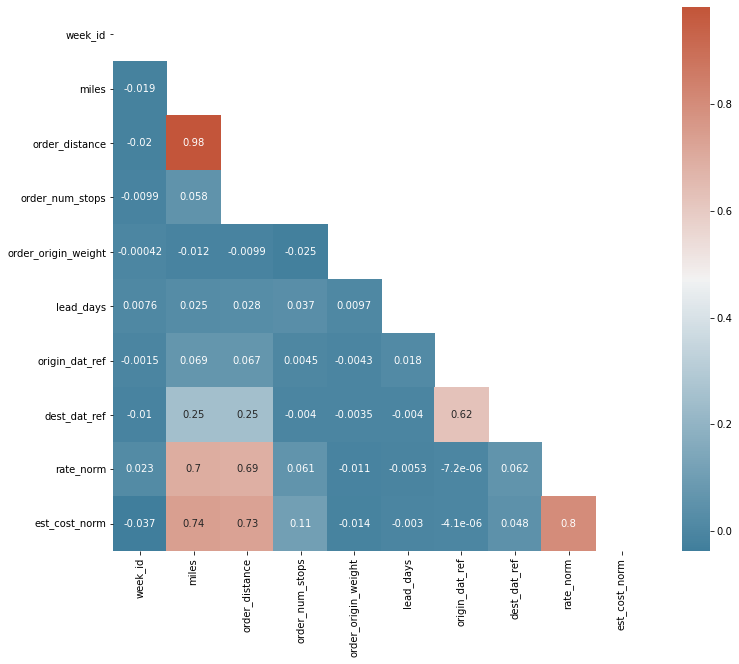

In [10]:
# Visualize the pair-wise correlation of the columns using pearson coefficient and displaying it using a heatmap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
order_corr = order_acceptance_df.corr()
f, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(order_corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(order_corr, annot=True, mask = mask, cmap=cmap)

The correlation table shows correlation between the pairs of columns with a high positive correlation (0.98) between 'order_distance' and 'miles'. The heatmap also shows this relationship. There is also a high correlation between 'rate_norm' and 'est_cost_norm'. Highly correlated features can hurt the model especially in a linear model

In [11]:
# View the distribution of the days of week for order requests
a = order_acceptance_df.groupby("weekday")["request_id"].count()

In [12]:
a

weekday
Fri    31400
Mon    31795
Sat     1486
Sun      836
Thu    33734
Tue    31257
Wed    31055
Name: request_id, dtype: int64

<AxesSubplot:xlabel='weekday'>

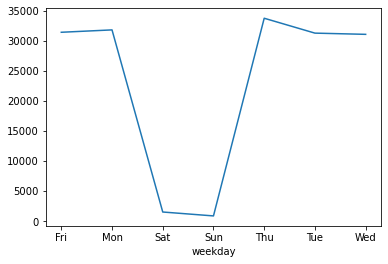

In [13]:
a.plot()

The line chart above shows that there is a huge decline in orders requested on Saturday and Sunday. It does not show a marked difference in the requests made during the week. The same plot is shown below as a bar chart.

<AxesSubplot:xlabel='weekday'>

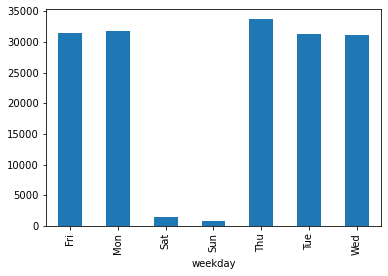

In [14]:
a.plot(kind = 'bar')

In [15]:
order_pie_chart = order_acceptance_df['CurrentCondition'].value_counts()

In [16]:
order_pie_chart

Accepted                     96165
Rejected                     37143
Withdrawn                    23800
Cancelled                     3388
Waiting On Acceptance          800
Waiting On Recommendation       95
NoPace                          54
Name: CurrentCondition, dtype: int64

<AxesSubplot:ylabel='CurrentCondition'>

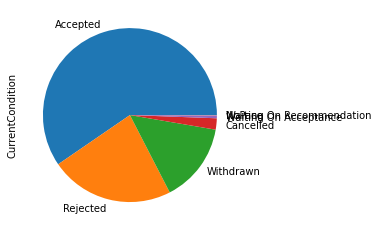

In [17]:
order_pie_chart.plot(kind = 'pie')

The pie chart shows that about 60% of the orders are marked as accepted. I would think this is a fair representation of the distribution of data and it does not skew towards any category. This means that the model trained on this data has a better chance to generalize well on newer data samples.

# Data cleaning

In [18]:
# drop the null values.
order_acceptance_df1 = order_acceptance_df.dropna()

In [19]:
# convert the categorical variables into numerical values for modeling
categorical_cols = ['weekday', 'order_equipment_type', 'color']

order_acceptance_df2 = pd.get_dummies(order_acceptance_df1, columns = categorical_cols)

In [20]:
order_acceptance_df2

,request_id,week_id,miles,order_distance,order_num_stops,order_origin_weight,lead_days,origin_dat_ref,dest_dat_ref,rate_norm,...,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,order_equipment_type_R,order_equipment_type_V,color_GREEN,color_RED,color_YELLOW
0,c2653eda11cd4d94879d1946392eb2b5,4,1856,1848.0,2,40000.0,3,633,978,2.273442,...,1,0,0,0,0,0,1,0,1,0
1,65e3dcc84a2246e68ea8636a967b31b2,3,56,47.0,2,12729.0,3,604,604,-0.971030,...,0,0,0,0,0,0,1,0,1,0
2,0a86f005640a4204b46c95ca033a7ced,1,259,255.0,2,44176.0,3,761,770,-0.393352,...,0,0,0,0,0,0,1,0,1,0
3,1105b4bc7b444f7985d4ad810e7acbc2,3,71,68.0,2,39847.0,6,187,180,-0.706546,...,0,0,1,0,0,0,1,0,1,0
4,de538100bb0f4137961b9551640ef35e,3,1182,1183.0,2,34912.0,3,972,922,1.014233,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161558,a15fa8bdb9924162999c502997b80ad2,4,274,0.0,2,44084.0,1,170,119,0.791117,...,0,0,1,0,0,0,1,1,0,0
161559,151354fa712049f1a6d1644ec17878f9,4,213,201.0,2,43500.0,7,57,132,-0.189311,...,0,0,0,1,0,0,1,0,0,1
161560,fa71111ad30d492683f9a6a5fbc9f07e,4,300,308.0,2,43500.0,3,551,527,-0.709962,...,0,0,0,1,0,0,1,1,0,0
161561,22de0c744a4741c2a1f14bf4a520a3c0,4,2209,2213.0,2,8280.0,12,490,945,2.681378,...,0,0,0,0,1,0,1,1,0,0


we used one-hot encoding so that that our models do not assume higher importance for higher numbers. For the target, we use label encoding below

In [21]:
from sklearn.preprocessing import LabelEncoder
order_acceptance_df2['CurrentCondition_encoded'] = LabelEncoder().fit_transform(order_acceptance_df2['CurrentCondition'])

In [22]:
order_acceptance_df2

,request_id,week_id,miles,order_distance,order_num_stops,order_origin_weight,lead_days,origin_dat_ref,dest_dat_ref,rate_norm,...,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,order_equipment_type_R,order_equipment_type_V,color_GREEN,color_RED,color_YELLOW,CurrentCondition_encoded
0,c2653eda11cd4d94879d1946392eb2b5,4,1856,1848.0,2,40000.0,3,633,978,2.273442,...,0,0,0,0,0,1,0,1,0,0
1,65e3dcc84a2246e68ea8636a967b31b2,3,56,47.0,2,12729.0,3,604,604,-0.971030,...,0,0,0,0,0,1,0,1,0,3
2,0a86f005640a4204b46c95ca033a7ced,1,259,255.0,2,44176.0,3,761,770,-0.393352,...,0,0,0,0,0,1,0,1,0,0
3,1105b4bc7b444f7985d4ad810e7acbc2,3,71,68.0,2,39847.0,6,187,180,-0.706546,...,0,1,0,0,0,1,0,1,0,3
4,de538100bb0f4137961b9551640ef35e,3,1182,1183.0,2,34912.0,3,972,922,1.014233,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161558,a15fa8bdb9924162999c502997b80ad2,4,274,0.0,2,44084.0,1,170,119,0.791117,...,0,1,0,0,0,1,1,0,0,0
161559,151354fa712049f1a6d1644ec17878f9,4,213,201.0,2,43500.0,7,57,132,-0.189311,...,0,0,1,0,0,1,0,0,1,3
161560,fa71111ad30d492683f9a6a5fbc9f07e,4,300,308.0,2,43500.0,3,551,527,-0.709962,...,0,0,1,0,0,1,1,0,0,0
161561,22de0c744a4741c2a1f14bf4a520a3c0,4,2209,2213.0,2,8280.0,12,490,945,2.681378,...,0,0,0,1,0,1,1,0,0,0


In [23]:
order_acceptance_df2.columns

Index(['request_id', 'week_id', 'miles', 'order_distance', 'order_num_stops',
       'order_origin_weight', 'lead_days', 'origin_dat_ref', 'dest_dat_ref',
       'rate_norm', 'est_cost_norm', 'CurrentCondition', 'weekday_Fri',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'order_equipment_type_R',
       'order_equipment_type_V', 'color_GREEN', 'color_RED', 'color_YELLOW',
       'CurrentCondition_encoded'],
      dtype='object')

# Classification modeling

In [24]:
# define independent variables, X, and target variable, y
# we drop 'order_distance' and 'est_cost_norm' from our modeling to reduce multicollinearity
col_names = ['week_id', 'miles', 'order_num_stops',
       'order_origin_weight', 'lead_days', 'origin_dat_ref', 'dest_dat_ref',
       'rate_norm', 'weekday_Fri',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'order_equipment_type_R',
       'order_equipment_type_V', 'color_GREEN', 'color_RED', 'color_YELLOW']


X = order_acceptance_df2[col_names]
y = order_acceptance_df2[["CurrentCondition_encoded"]]

In [25]:
# Create a train/test split in a ratio of 75% to 25% with train: 75% and test: 25%
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

# Classification model 1

We have seven categories for the 'CurrentCondition', the outcome variable. A logistic regression model would be an appropriate classifier to predict if orders would be accepted or rejected or any of the other categories. 

In [26]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()


# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# fit the model with data
logreg.fit(X_train, y_train)

#
y_pred = logreg.predict(X_test)

/Users/riddyokanlawon/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/riddyokanlawon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[21292,     0,     0,  2115,     0,     0,     5],
       [  721,     0,     0,    72,     0,     0,     0],
       [   11,     0,     0,     3,     0,     0,     0],
       [ 6098,     0,     0,  2839,     0,     0,     0],
       [  136,     0,     0,    22,     0,     0,     1],
       [   12,     0,     0,     8,     0,     0,     0],
       [ 4271,     0,     0,  1534,     0,     0,     3]])

Text(0.5, 257.44, 'Predicted label')

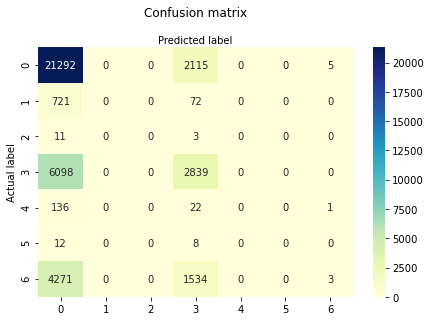

In [28]:
class_names=[0, 1, 2, 3, 4, 5, 6] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [29]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6165597935773957


# Classification model 2

We build a second model using Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

<ipython-input-31-e309b8838252>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [32]:
y_pred_rf = classifier.predict(X_test)

In [33]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_rf))

Accuracy: 0.760238101320798


The second model, random forest, outperforms the logistic regression-based model with accuracy of the latter being 60% and the former being 76%. The accuracy is the total number of correctly classified data instances in the test set divided by the total number of classifications. 

In [35]:
# report which features were selected by RFE
# define RFE
from sklearn.feature_selection import RFE
rfe = RFE(estimator = classifier, n_features_to_select = 5)
# fit RFE
rfe.fit(X_train, y_train)
# summarize all features
for i in range(X.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

/Users/riddyokanlawon/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
/Users/riddyokanlawon/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
/Users/riddyokanlawon/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
/Users/riddyokanlawon/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_rfe.py:196: DataConversionWarn

Column: 0, Selected False, Rank: 5.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected False, Rank: 16.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected False, Rank: 2.000
Column: 5, Selected True, Rank: 1.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected False, Rank: 7.000
Column: 9, Selected False, Rank: 10.000
Column: 10, Selected False, Rank: 14.000
Column: 11, Selected False, Rank: 15.000
Column: 12, Selected False, Rank: 9.000
Column: 13, Selected False, Rank: 6.000
Column: 14, Selected False, Rank: 8.000
Column: 15, Selected False, Rank: 11.000
Column: 16, Selected False, Rank: 13.000
Column: 17, Selected False, Rank: 4.000
Column: 18, Selected False, Rank: 3.000
Column: 19, Selected False, Rank: 12.000


In [37]:
X.columns

Index(['week_id', 'miles', 'order_num_stops', 'order_origin_weight',
       'lead_days', 'origin_dat_ref', 'dest_dat_ref', 'rate_norm',
       'weekday_Fri', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed', 'order_equipment_type_R',
       'order_equipment_type_V', 'color_GREEN', 'color_RED', 'color_YELLOW'],
      dtype='object')

In [38]:
# report which features were selected by RFE
# define RFE
from sklearn.feature_selection import RFE
rfe2 = RFE(estimator = logreg, n_features_to_select = 5)
# fit RFE
rfe2.fit(X_train, y_train)
# summarize all features
for i in range(X.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

/Users/riddyokanlawon/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/riddyokanlawon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/riddyokanlawon/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

Column: 0, Selected False, Rank: 5.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected False, Rank: 16.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected False, Rank: 2.000
Column: 5, Selected True, Rank: 1.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected False, Rank: 7.000
Column: 9, Selected False, Rank: 10.000
Column: 10, Selected False, Rank: 14.000
Column: 11, Selected False, Rank: 15.000
Column: 12, Selected False, Rank: 9.000
Column: 13, Selected False, Rank: 6.000
Column: 14, Selected False, Rank: 8.000
Column: 15, Selected False, Rank: 11.000
Column: 16, Selected False, Rank: 13.000
Column: 17, Selected False, Rank: 4.000
Column: 18, Selected False, Rank: 3.000
Column: 19, Selected False, Rank: 12.000


/Users/riddyokanlawon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


For the logistic regression model, the most important features are 'miles', 'order_origin_weight', 'origin_dat_ref', 'dest_dat_ref'.
This is similar to the random forest model as well.

Overfitting happens when a model performs well on training set but not on a test set. Some of the reasons why our models might have overfit is we have outliers in the data points that we did not account for which makes the data noisy. Random forest is also known to overfit models. We can reduce overfitting by plotting training and validation loss so that we know to converge our model earlier.

# Context and critical reflection

I would like to know if the data outcome cares about the individual 'CurrentCondition' categories like 'Withdrawn' or 'Canceled'. If not, I can categorize all non-acceptance as rejection and see if my models perform any better.<br>
Also, a better context on the missing values would help in better handling them. Instead of just dropping all rows with missing values, we could do data imputation given better understanding of business/problem context.

To better address the question, I would: <br>
1. Derive new features to improve the feature set. e.g. derive one based on cost of shipment and miles. <br>
2. Perform more EDA to see relationships between acceptance and destination vs origin. <br>
3. Hypothesis testing (one-sample t-test) to see if the distribution of the categories and see if my assumptions are confirmed. <br>
4. To improve performance of my models, I will perform cross-validation for logistic regression.